In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely

In [80]:
def convertGeometries(df):
    for i in list(df.index):
        geom_type = df.loc[i, 'GeometryType']
#         print(geom_type)
        geom = None
        if geom_type == 'Point':
            geom = shapely.geometry.Point(df.loc[i,'Coordinates'])
        elif geom_type == 'GeometryCollection':
            if df.loc[i,'Coordinates'][0] == df.loc[i,'Coordinates'][-1]:
                geom = shapely.geometry.Polygon(df.loc[i,'Coordinates'])
            else:
                geom = shapely.geometry.LineString(df.loc[i,'Coordinates'])
        df.loc[i, 'geometry'] = geom

In [57]:
df = pd.read_csv('./data-versions/navwarnings-dates-centroids.csv')#.sample(frac=0.1).reset_index()
# df = df.sample(frac=0.05)
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(df[df['lon_centroid'] < -180].index)
df = df.drop(df[df['lon_centroid'] > 180].index)
df = df.drop(df[df['lat_centroid'] < -90].index)
df = df.drop(df[df['lat_centroid'] > 90].index)

df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['BroadcastingDate'] = pd.to_datetime(df['BroadcastingDate'])
df['Coordinates'] = df['Coordinates'].apply(lambda c: eval(c))
# convertGeometries(df)

In [84]:
df['geometry'] = pd.Series(np.zeros(len(df)), index=df.index)

In [85]:
convertGeometries(df)

TypeError: float() argument must be a string or a number, not 'Point'

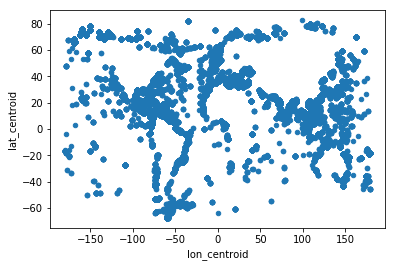

In [59]:
df[['lon_centroid', 'lat_centroid']].plot.scatter('lon_centroid', 'lat_centroid')

In [313]:
class RiskGrid:
    def __init__(self, df, cellSize):
        self.cellSize = cellSize
        
        lats = np.arange(0, 180 + cellSize, cellSize, dtype=np.single)
        lons = np.arange(0, 360 + cellSize, cellSize, dtype=np.single)
        
        multiindex = pd.MultiIndex.from_product([lons.tolist(), lats.tolist()], names=['lons', 'lats'])
        grid = gpd.GeoDataFrame(index=multiindex, columns = ['box'])
        grid['risk'] = pd.Series(np.zeros(len(grid.index)), index=grid.index)

        # Create boxes 
        for i in lats:
            for c in lons:
                box = shapely.geometry.box(c, i, c + cellSize, i + cellSize)
                
                grid.loc[(c,i), 'box'] = box
        
        
        for row in df.iterrows():
            x = float(row[1]['lon_centroid'] + 180)
            y = float(row[1]['lat_centroid'] + 90)

            grid.loc[( x - x % cellSize, y - y % cellSize), 'risk'] += 1

        self.grid = grid
    
    def plotRiskGrid(self):
        fig, ax = plt.subplots(figsize = (10,6))
        g = self.grid['risk'].unstack().T.sort_index(axis=0, ascending=False)
#         g = g['risk'].unstack()
        ax.imshow(g.where(g > 0))
        plt.show()

In [314]:
r = RiskGrid(df.sample(frac=0.1), 20)

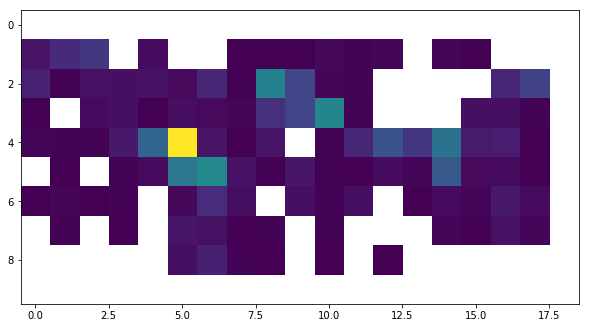

In [315]:
r.plotRiskGrid()

KeyError: 'risk'

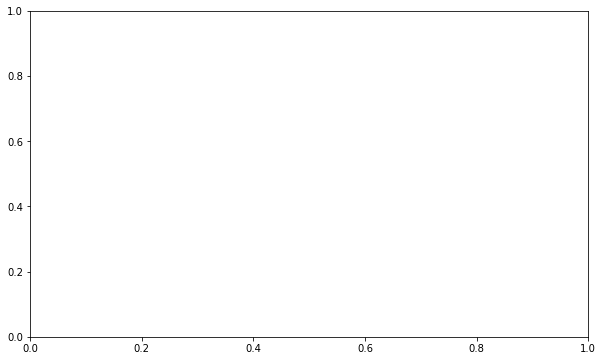

In [297]:
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(x.where(x['risk'] > 0))
plt.show()

In [271]:
x

,0.0,3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0,...,333.0,336.0,339.0,342.0,345.0,348.0,351.0,354.0,357.0,360.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


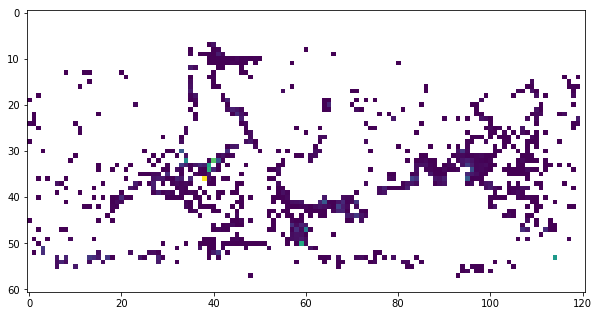

In [270]:
# plt.style.context('lightbackground')

fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(x.where(x > 0))
plt.show()

In [72]:
routeLine = shapely.geometry.LineString([[59.6777344,16.5519617],[44.8242188,11.5230875],[34.4970703,26.9416595]])

In [89]:
gdfLine = gpd.GeoSeries( data=[routeLine])

In [90]:
gdfLine

0    LINESTRING (59.6777344 16.5519617, 44.8242188 ...
dtype: object

In [91]:
lls = [[1,0], [2,0], [1,1], [2,1]]
urs = [[2,1], [3,1], [2,2], [3,2]]

In [99]:
geoms = []
for i, c in enumerate(lls):
    box = shapely.geometry.box(c[0], c[1], urs[i][0], urs[i][1])
    geoms.append(box)

boxes = gpd.GeoSeries(geoms)
line = gpd.GeoSeries([shapely.geometry.LineString([[0,0], [4.5, 2]])])

In [113]:
intersectingMask = boxes.intersects(line[0])

In [119]:
boxes.intersection(line[0])[0].length / line[0].length

0.22222222222222224

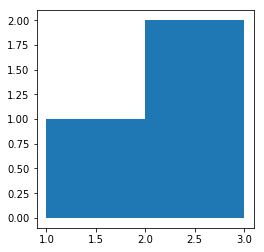

In [115]:
boxes.where(intersectingMask).plot()

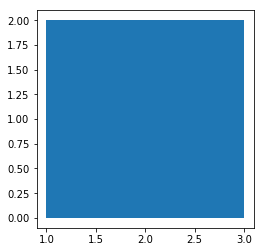

In [107]:
boxes.plot()